In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import jax

jax.config.update("jax_enable_x64", True)

import galsim as gs
import jax_galsim as jgs
import ultraplot as uplt
import numpy as np

In [58]:
def _plot_gsmod(func, fourier=False, amp_phase=False):

    if not fourier:
        fig, axs = uplt.subplots(nrows=2, ncols=3)

        for row, cen in zip([0, 1], [True, False]):
            im_gs = func(gs, cen=cen)
            im_jgs = func(jgs, cen=cen)

            ax = axs[row, 0]
            m = ax.pcolormesh(im_jgs.array, discrete=False)
            ax.colorbar(m, loc="t")
            ax.format(grid=False, title="jax")


            ax = axs[row, 1]
            m = ax.pcolormesh(im_gs.array, discrete=False)
            ax.colorbar(m, loc="t")
            ax.format(grid=False, title="galsim")

            ax = axs[row, 2]
            m = ax.pcolormesh(im_jgs.array - im_gs.array, discrete=False)
            ax.colorbar(m, loc="t")
            ax.format(grid=False, title="jax - galsim")

        axs.format(xlabel="x [pixels]", ylabel="y [pixels]")
    else:
        fig, axs = uplt.subplots(nrows=2, ncols=6, sharex=0, sharey=0)

        for cen, row in zip([True, False], [0, 1]):
            im_gs = func(gs, cen=cen)
            im_jgs = func(jgs, cen=cen)

            if amp_phase:
                tname0 = "amp. "
                pgs0 = np.abs(im_gs.array)
                pjgs0 = np.abs(im_jgs.array)

                tname1 = "angle "
                pgs1 = np.angle(im_gs.array)
                pjgs1 = np.angle(im_jgs.array)
            else:
                tname0 = "real "
                pgs0 = im_gs.array.real
                pjgs0 = im_jgs.array.real

                tname1 = "image "
                pgs0 = im_gs.array.imag
                pjgs0 = im_jgs.array.imag


            for offset, tname, pgs, pjgs in [
                (0, tname0, pgs0, pjgs0),
                (3, tname1, pgs1, pjgs1),
            ]:

                ax = axs[row, 0 + offset]
                m = ax.pcolormesh(pjgs, discrete=False)
                ax.colorbar(m, loc="t")
                ax.format(grid=False, title=f"{tname}jax")

                ax = axs[row, 1 + offset]
                m = ax.pcolormesh(pgs, discrete=False)
                ax.colorbar(m, loc="t")
                ax.format(grid=False, title=f"{tname}galsim")

                ax = axs[row, 2 + offset]
                m = ax.pcolormesh(pjgs - pgs, discrete=False)
                ax.colorbar(m, loc="t")
                ax.format(grid=False, title=f"{tname}jax - galsim")

            axs.format(xlabel="kx", ylabel="ky")

    return fig, axs

## Try Simple Rendering of Offset Profiles in Fourier-space

(15, 15) 1.3962634015954636
(15, 15) 1.3962634015954636
(59, 59) 0.3436860927239279
(59, 59) 0.3436860927239279


(Figure(nrows=2, ncols=6, refwidth=2.5),
 SubplotGrid(nrows=2, ncols=6, length=12))

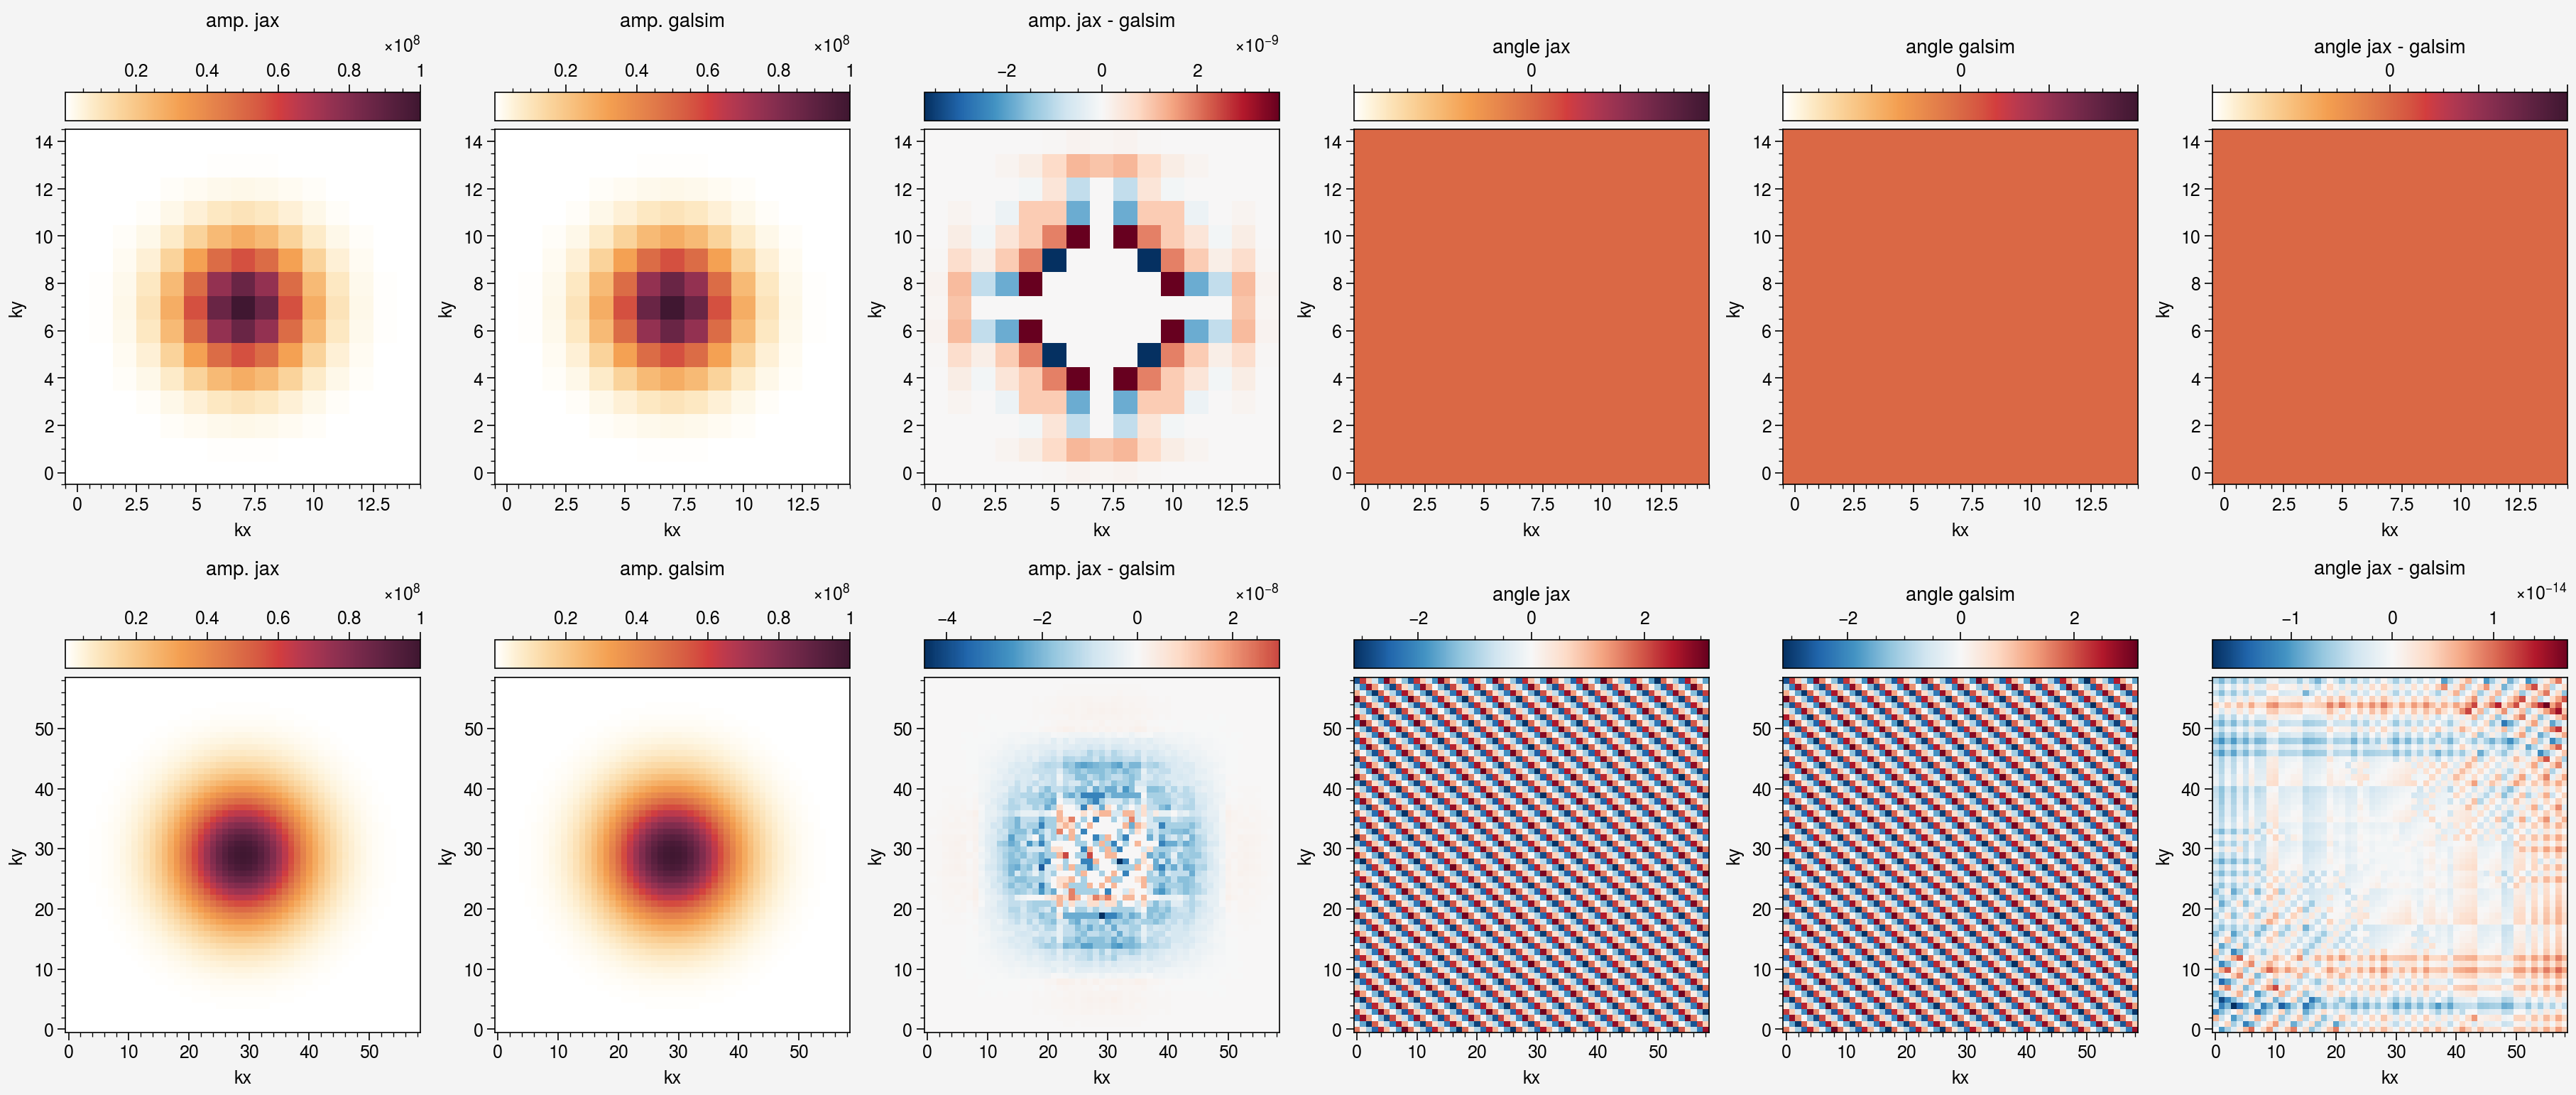

In [33]:
def _make_data(gsmod, cen=False):

    scale = 0.2
    if cen:
        dx = 0.0
        dy = 0.0
    else:
        dx = 20.23
        dy = 27.89

    obj = gsmod.Gaussian(fwhm=0.9).withFlux(1e8).shift(dx * scale, dy * scale)
    img = obj.drawKImage()
    print(img.array.shape, img.scale)
    return img

_plot_gsmod(_make_data, fourier=True, amp_phase=True)

(23, 23) 0.934050971722558
(23, 23) 0.9340509717225579
(61, 61) 0.3253291016193362
(61, 61) 0.3253291016193362


(Figure(nrows=2, ncols=6, refwidth=2.5),
 SubplotGrid(nrows=2, ncols=6, length=12))

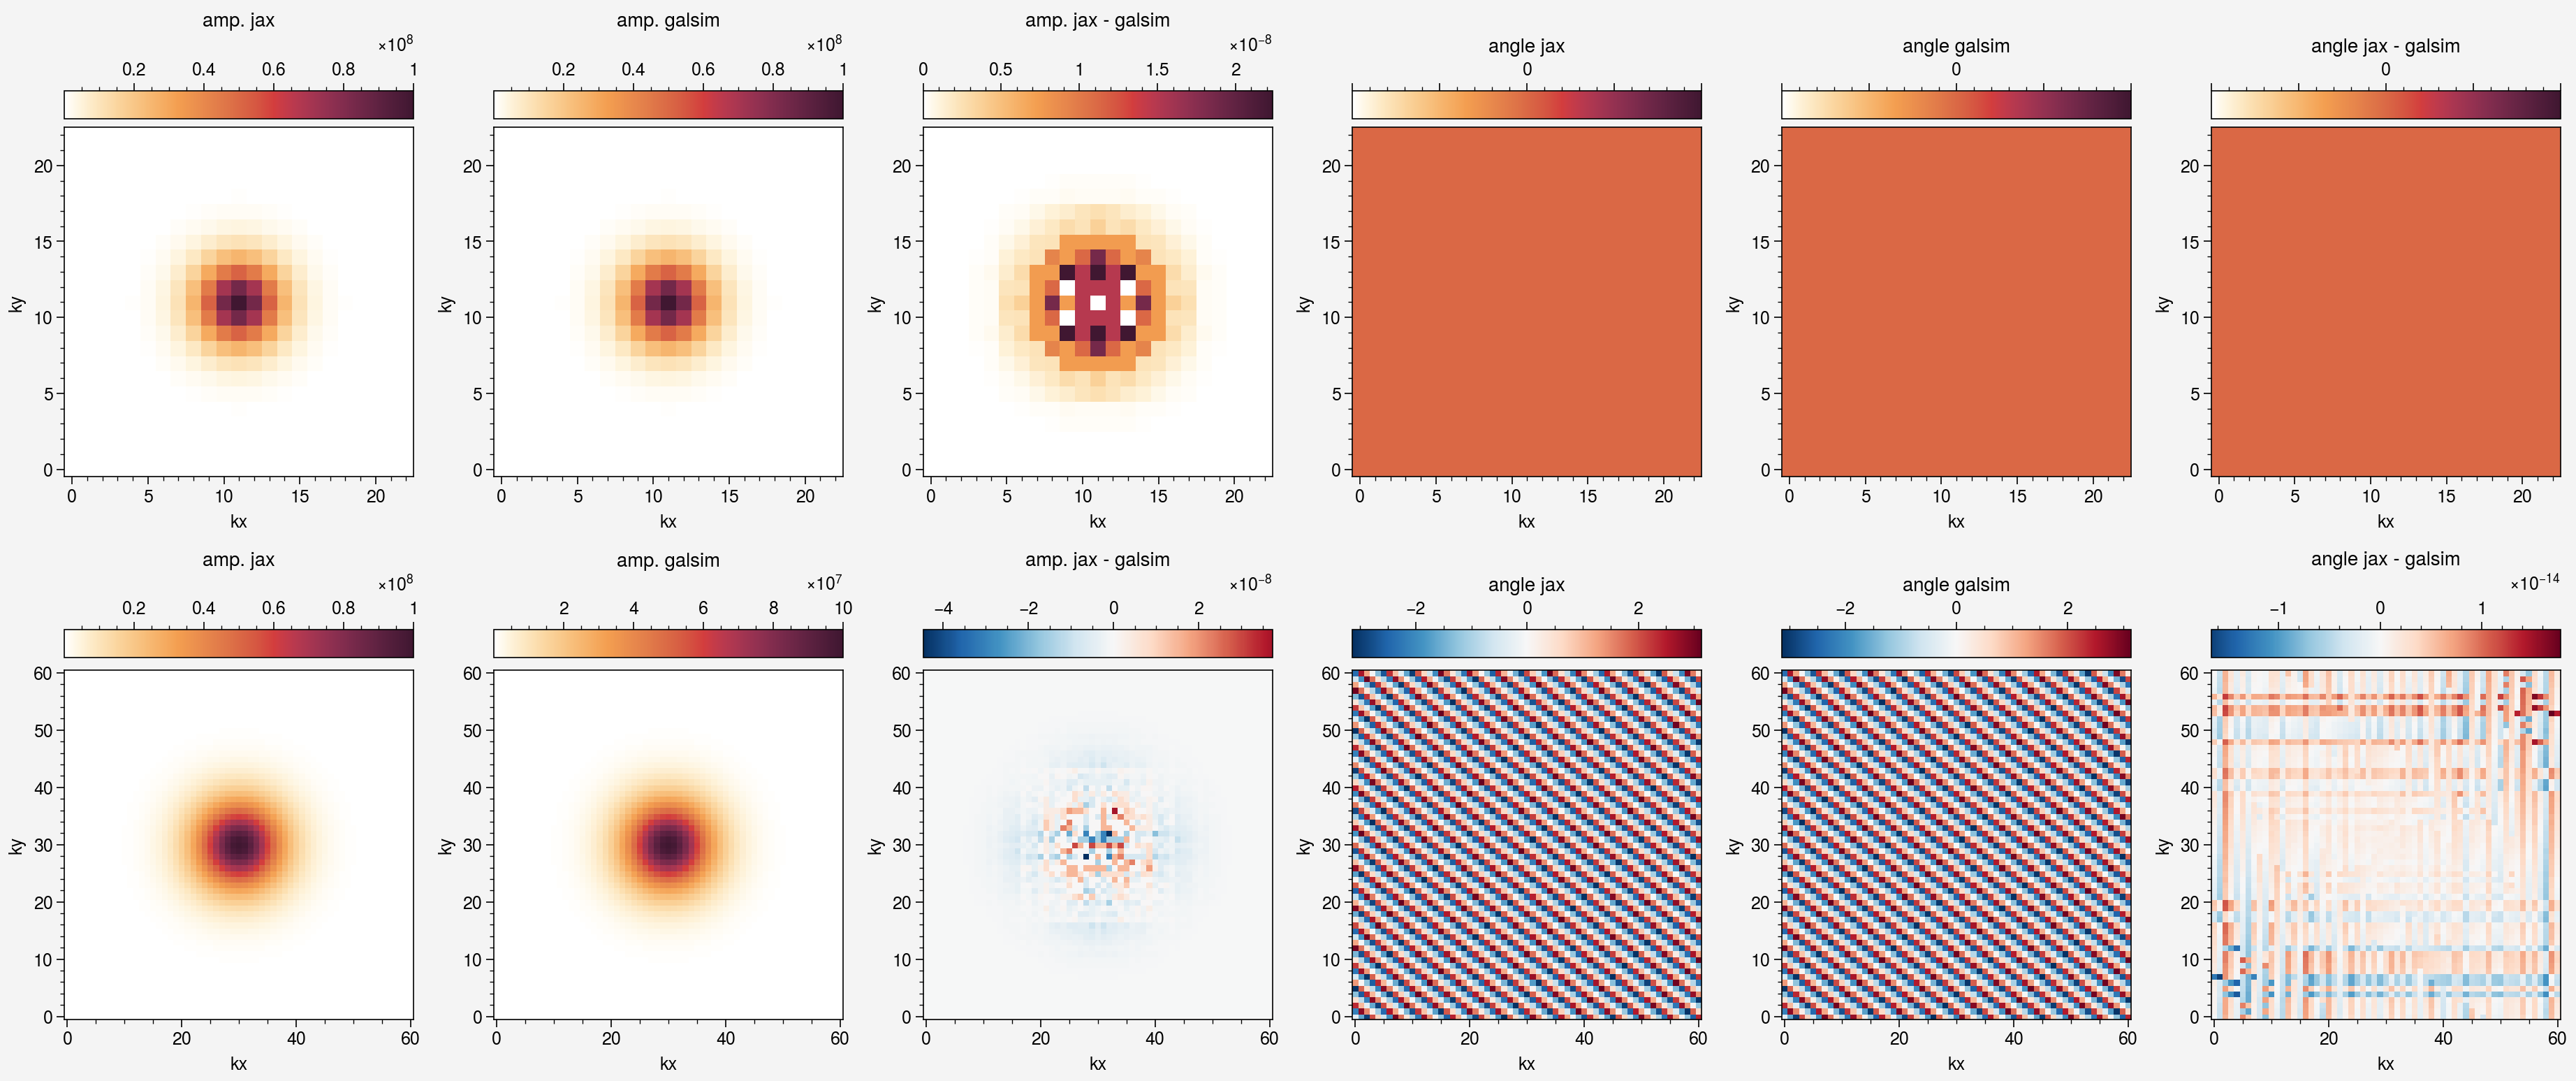

In [34]:
def _make_data(gsmod, cen=False):

    scale = 0.2
    if cen:
        dx = 0.0
        dy = 0.0
    else:
        dx = 20.23
        dy = 27.89

    psf = gsmod.Gaussian(fwhm=0.9)
    gal = gsmod.Exponential(half_light_radius=0.5).withFlux(1e8).shift(dx * scale, dy * scale)
    obj = gsmod.Convolve([psf, gal])

    img = obj.drawKImage()
    print(img.array.shape, img.scale)
    return img

_plot_gsmod(_make_data, fourier=True, amp_phase=True)

(13, 13) 1.3216779628037036
(13, 13) 1.3216779628037036
(47, 47) 0.3389774705968504
(47, 47) 0.3389774705968504


(Figure(nrows=2, ncols=6, refwidth=2.5),
 SubplotGrid(nrows=2, ncols=6, length=12))

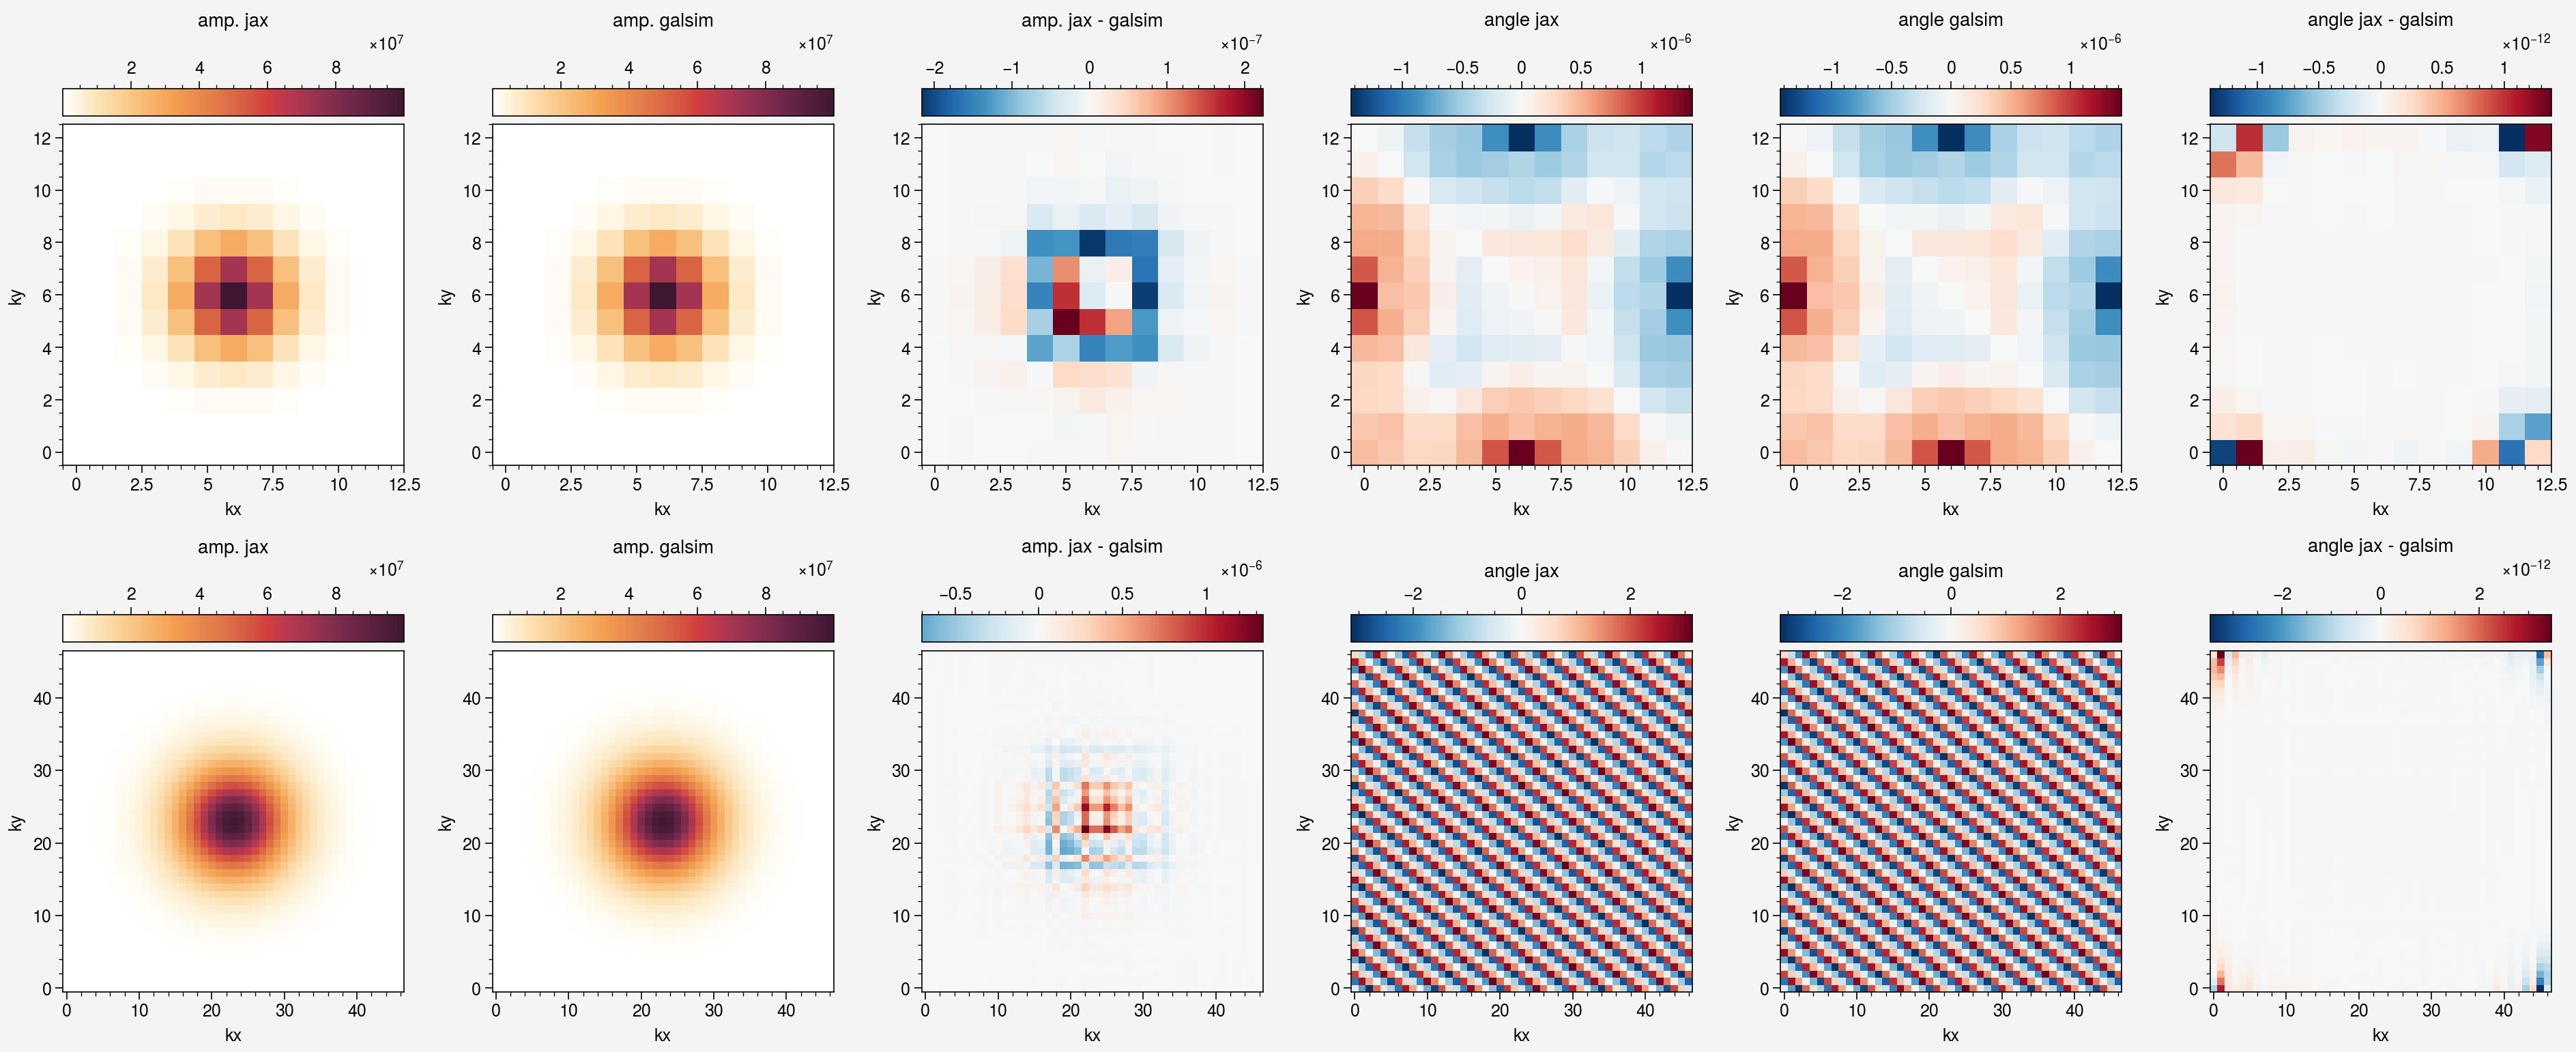

In [ ]:
def _make_data(gsmod, cen=False):
    scale = 0.2
    if cen:
        dx = 0.0
        dy = 0.0
    else:
        dx = 20.23
        dy = 27.89
    psf = gsmod.Gaussian(fwhm=0.9, gsparams=gsp)
    gal = gsmod.Exponential(half_light_radius=0.5, gsparams=gsp).withFlux(1e8)
    obj = gsmod.Convolve([psf, gal], gsparams=gsp)

    if cen:
        nx = 13
        dk = 1.3216779628037036
    else:
        nx = 47
        dk = 0.3389774705968504

    # you have to render this image in double in order to get the
    # FFT to match galsim
    img = obj.drawImage(scale=scale, dtype=float)
    img = gsmod.InterpolatedImage(
        img, scale=0.2,
    ).shift(
        dx * scale, dy * scale
    ).drawKImage(nx=nx, ny=nx, scale=dk)
    print(img.array.shape, img.scale)
    return img

_plot_gsmod(_make_data, fourier=True, amp_phase=True)

## Try Simple Rendering

(Figure(nrows=2, ncols=2, refwidth=2.5),
 SubplotGrid(nrows=2, ncols=2, length=4))

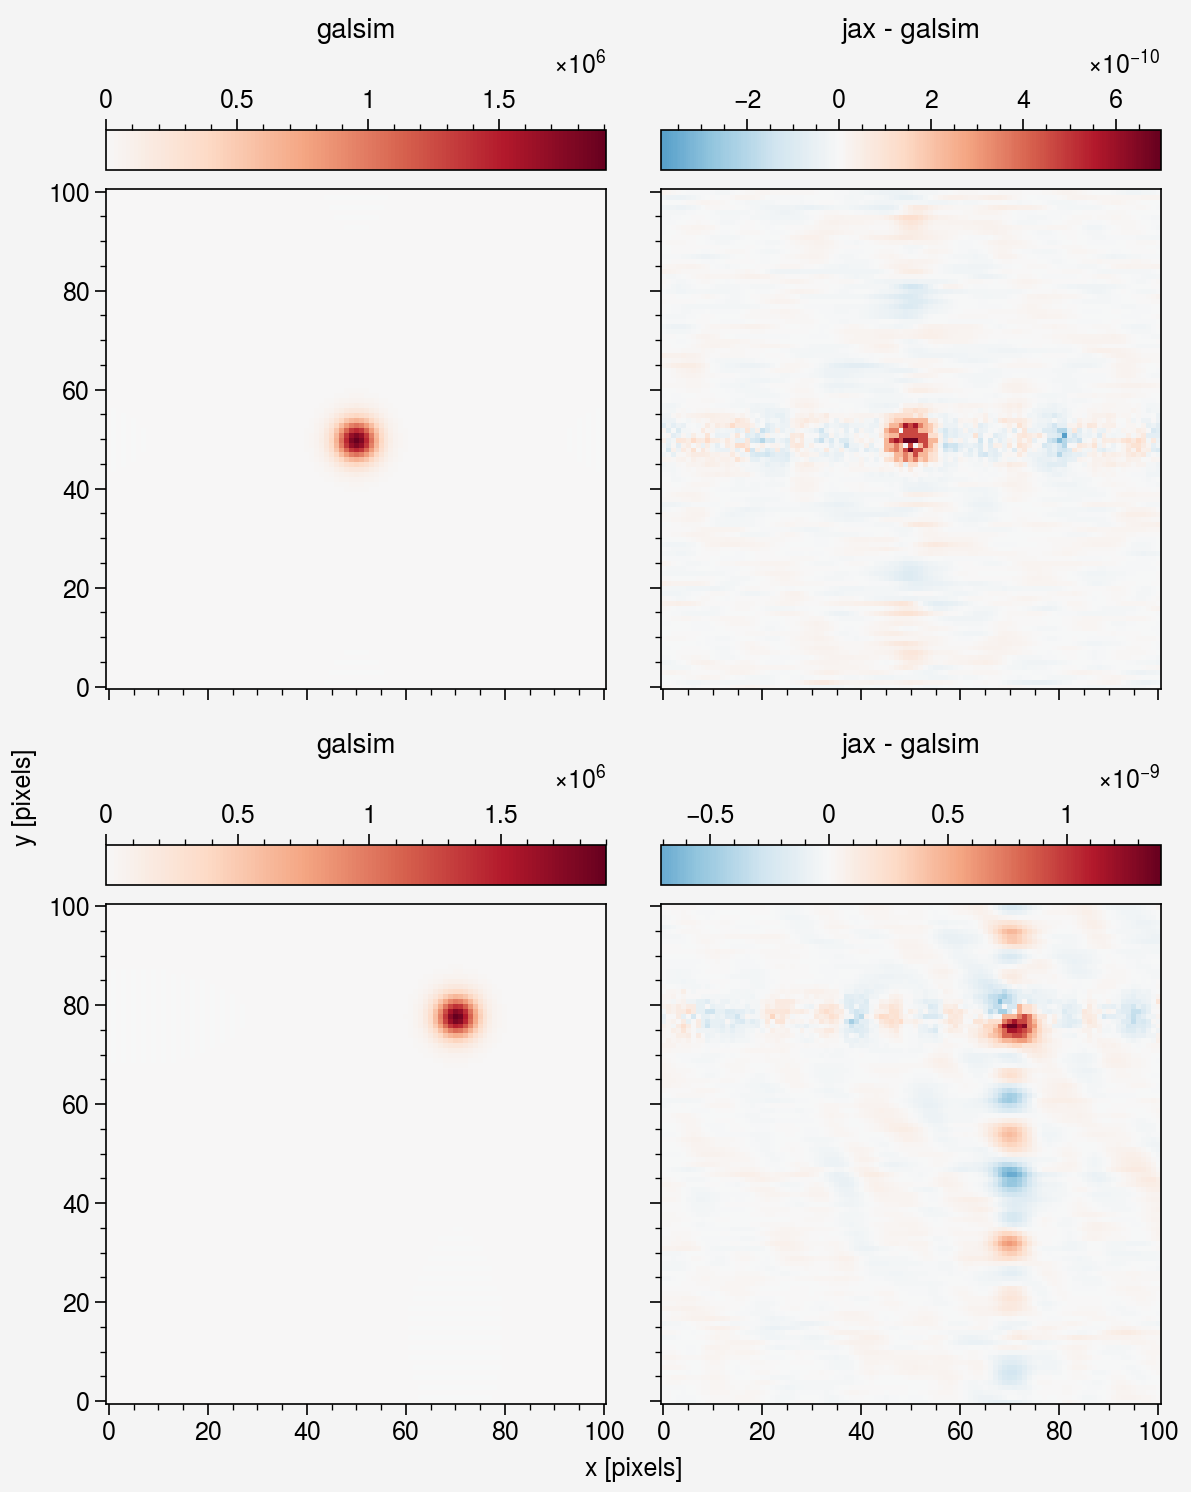

In [51]:
def _make_data(gsmod, cen=False):
    scale = 0.2
    if cen:
        dx = 0.0
        dy = 0.0
    else:
        dx = 20.23
        dy = 27.89
    psf = gsmod.Gaussian(fwhm=0.9)
    gal = gsmod.Exponential(half_light_radius=0.5).withFlux(1e8).shift(dx * scale, dy * scale)
    obj = gsmod.Convolve([psf, gal])

    return obj.drawImage(nx=101, ny=101, scale=scale, dtype=float)


_plot_gsmod(_make_data)

(Figure(nrows=2, ncols=2, refwidth=2.5),
 SubplotGrid(nrows=2, ncols=2, length=4))

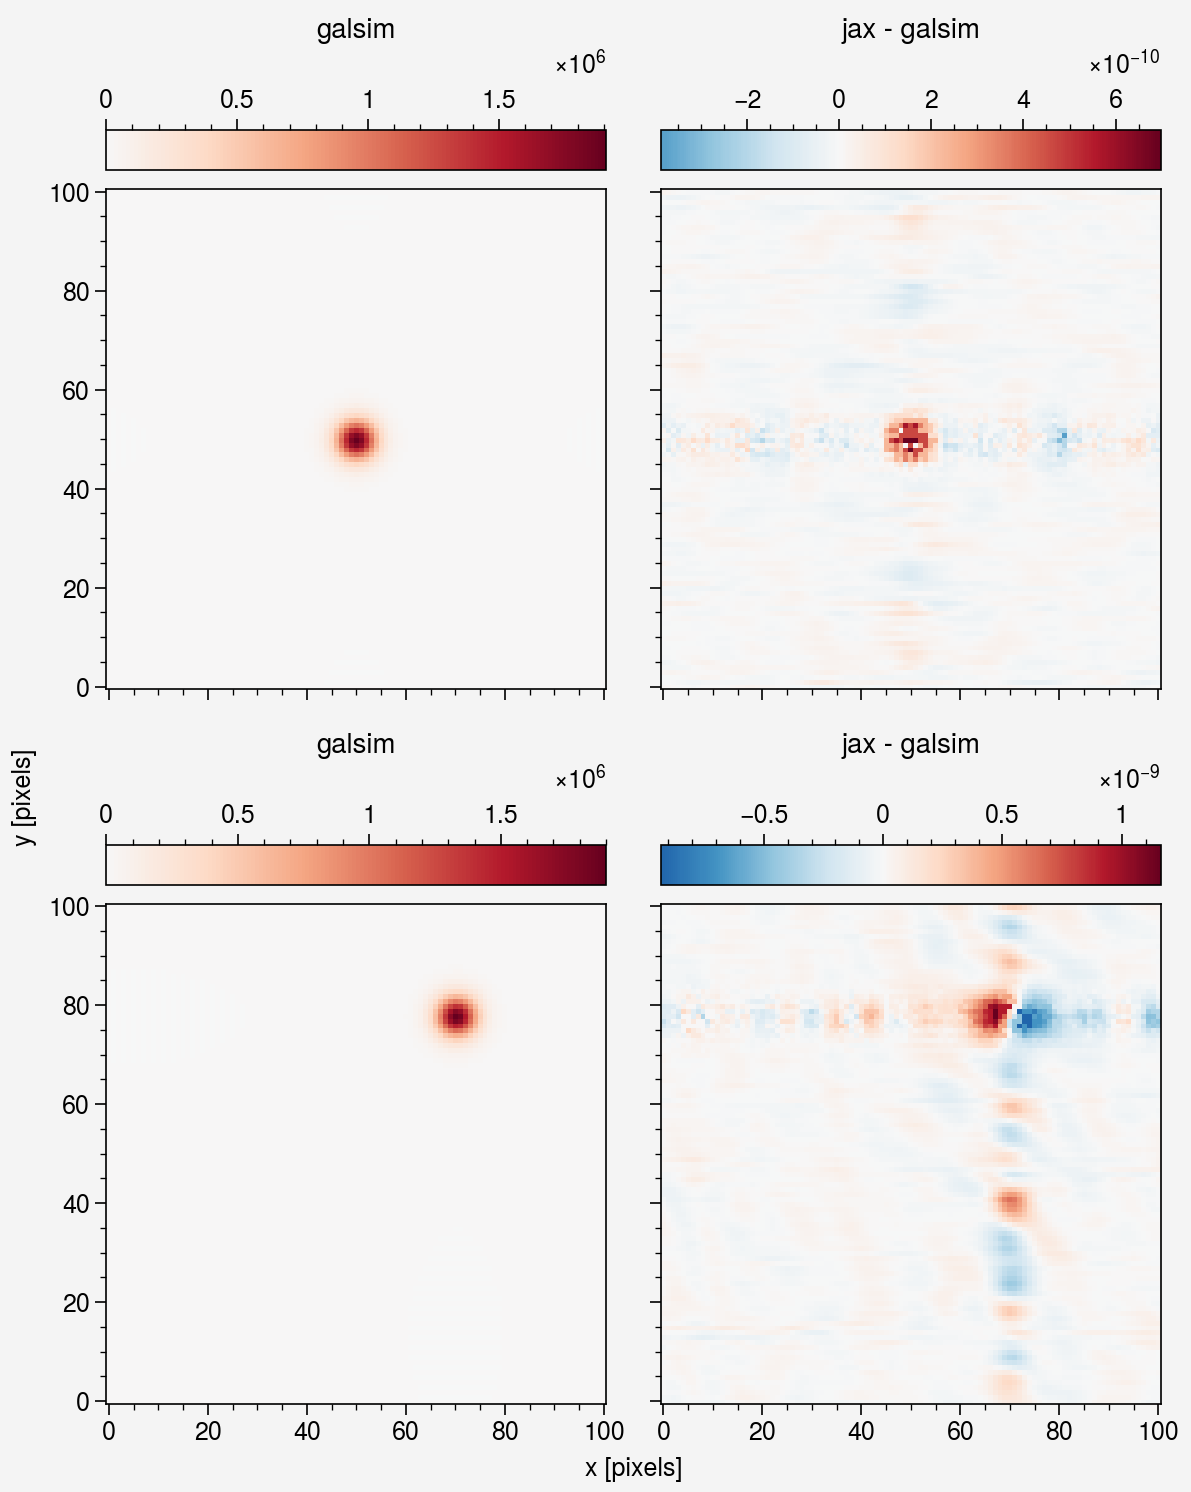

In [55]:
def _make_data(gsmod, cen=False):
    scale = 0.2
    if cen:
        dx = 0.0
        dy = 0.0
    else:
        dx = 20.23
        dy = 27.89
    psf = gsmod.Gaussian(fwhm=0.9)
    gal = gsmod.Exponential(half_light_radius=0.5).withFlux(1e8)
    obj = gsmod.Convolve([psf, gal])

    return obj.drawImage(nx=101, ny=101, scale=scale, offset=(dx, dy), dtype=float)


_plot_gsmod(_make_data)

## Try Interp Image Rendering

(Figure(nrows=2, ncols=2, refwidth=2.5),
 SubplotGrid(nrows=2, ncols=2, length=4))

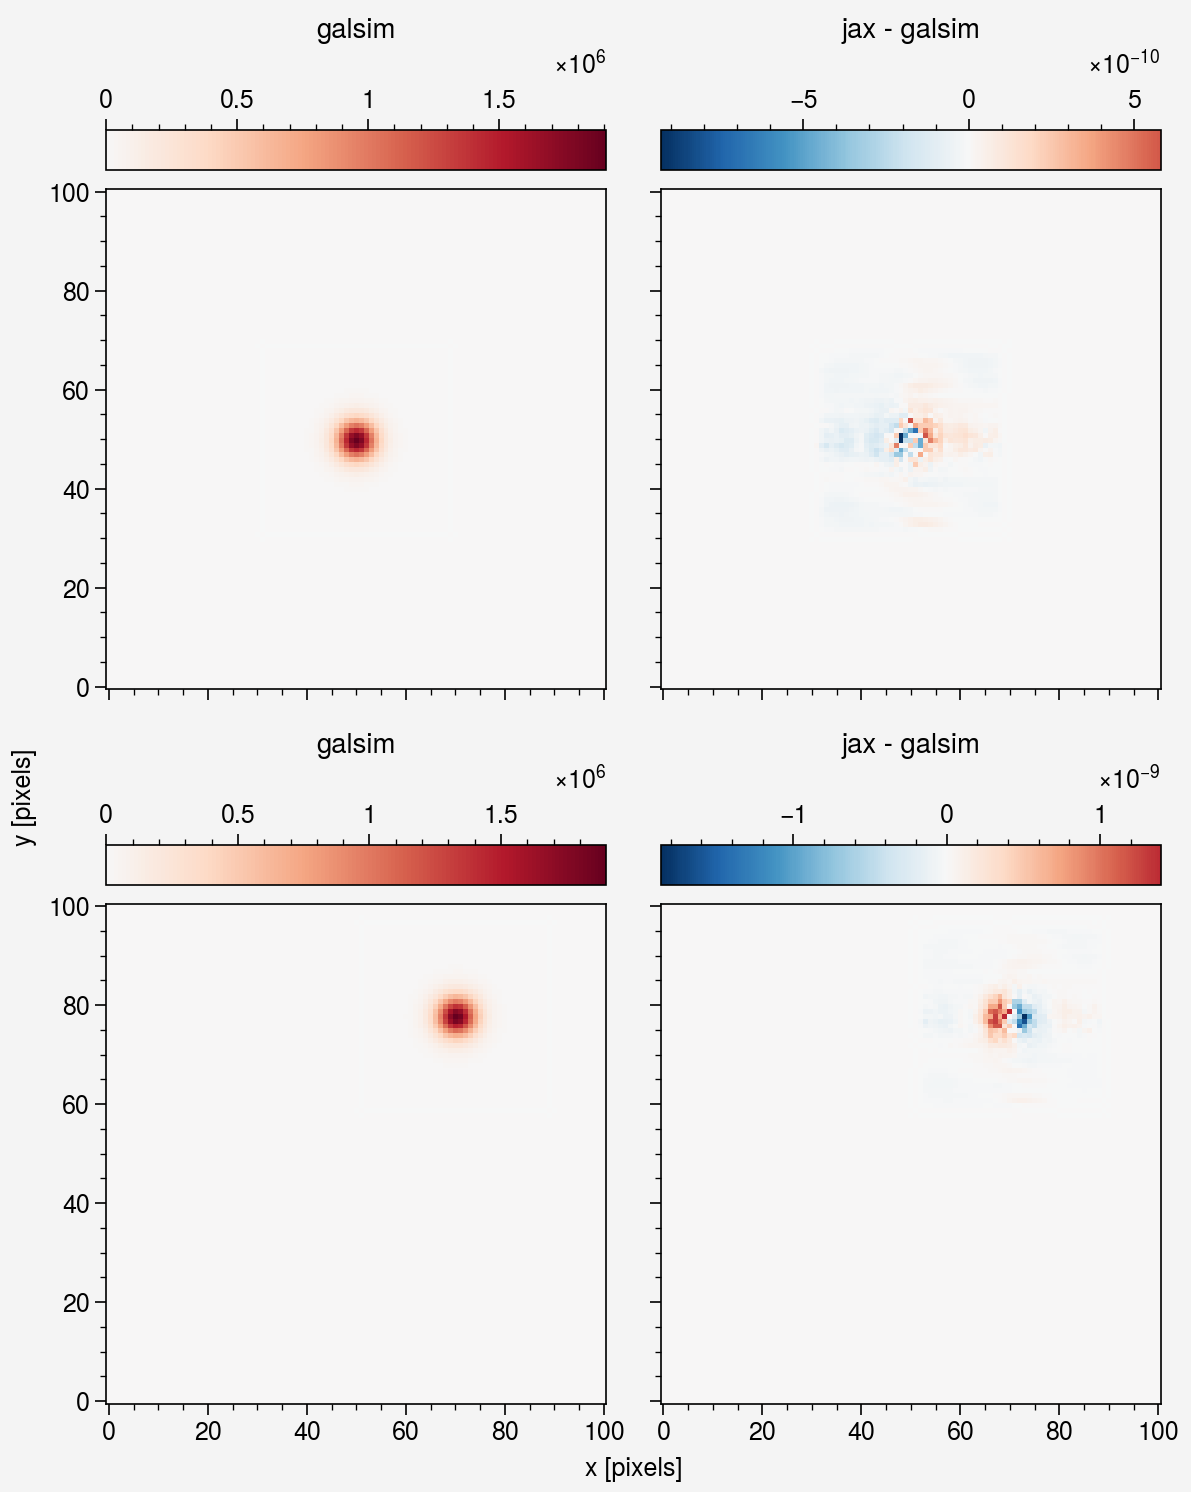

In [52]:
def _make_data(gsmod, cen=False):
    scale = 0.2
    if cen:
        dx = 0.0
        dy = 0.0
    else:
        dx = 20.23
        dy = 27.89
    psf = gsmod.Gaussian(fwhm=0.9)
    gal = gsmod.Exponential(half_light_radius=0.5).withFlux(1e8)
    obj = gsmod.Convolve([psf, gal])

    img = obj.drawImage(scale=scale, dtype=float)
    return gsmod.InterpolatedImage(
        img, scale=0.2
    ).shift(
        dx * scale, dy * scale
    ).drawImage(
        nx=101,
        ny=101,
        scale=scale,
        method="no_pixel",
        dtype=float,
    )


_plot_gsmod(_make_data)

(Figure(nrows=2, ncols=2, refwidth=2.5),
 SubplotGrid(nrows=2, ncols=2, length=4))

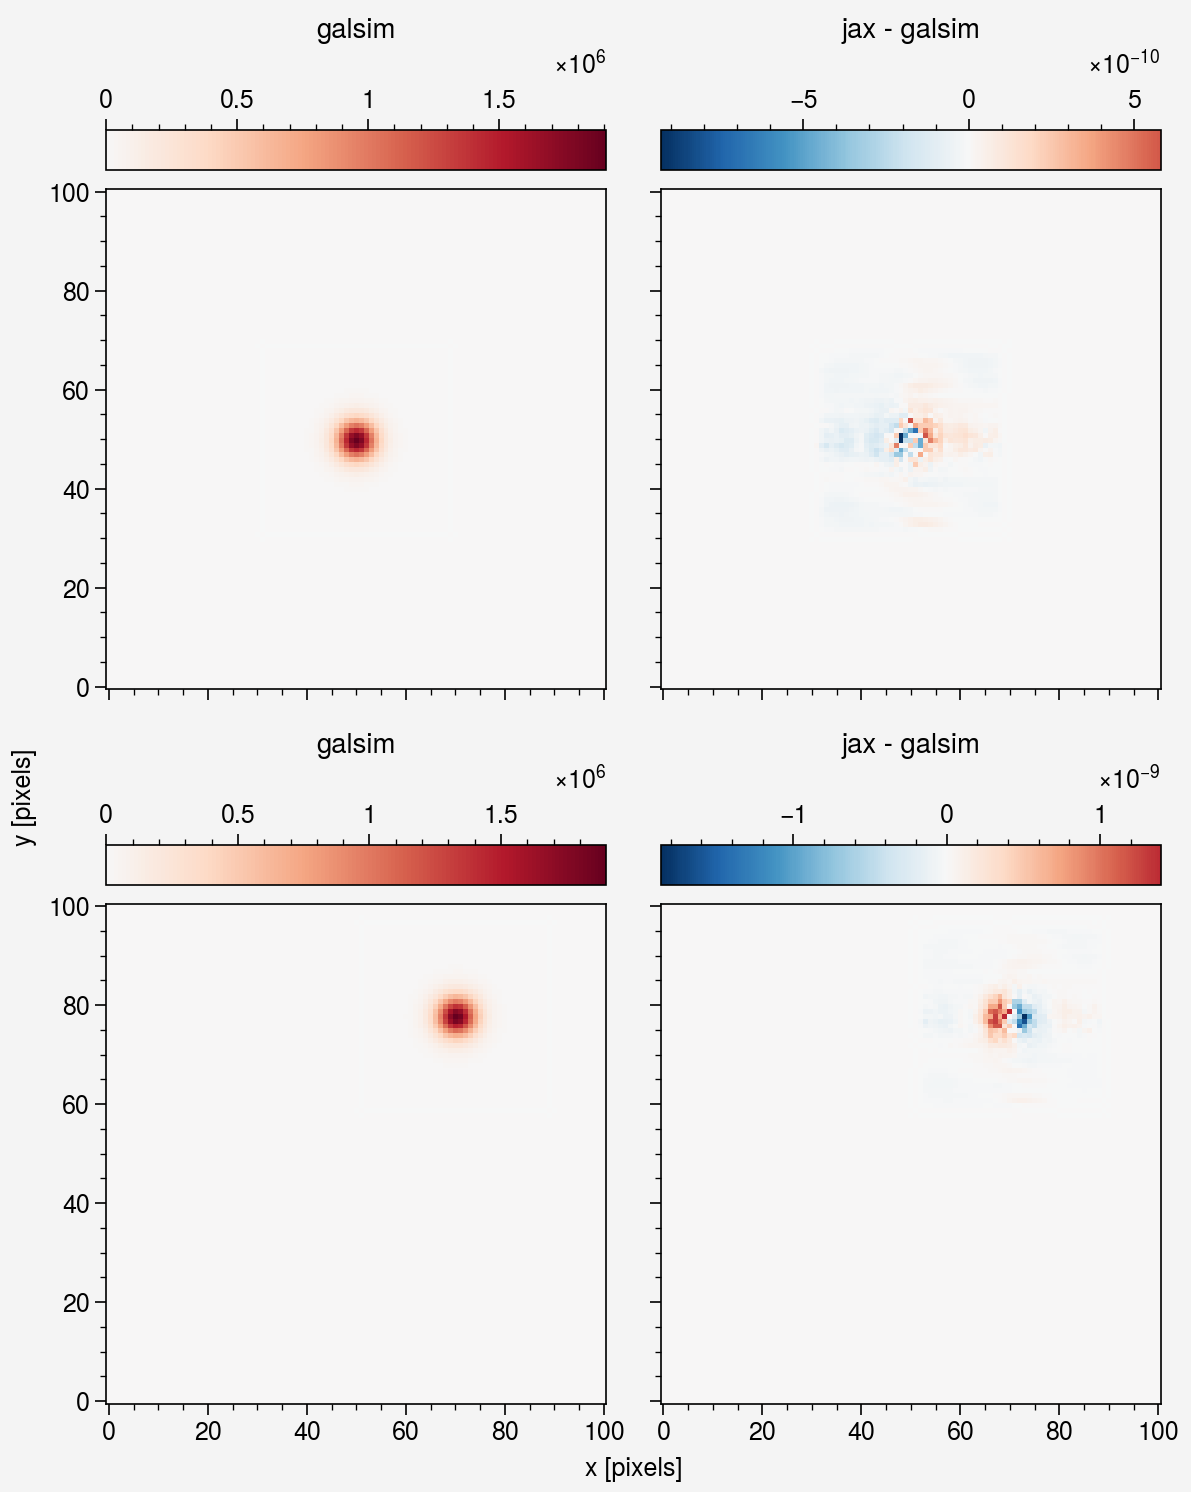

In [54]:
def _make_data(gsmod, cen=False):
    scale = 0.2
    if cen:
        dx = 0.0
        dy = 0.0
    else:
        dx = 20.23
        dy = 27.89
    psf = gsmod.Gaussian(fwhm=0.9)
    gal = gsmod.Exponential(half_light_radius=0.5).withFlux(1e8)
    obj = gsmod.Convolve([psf, gal])

    img = obj.drawImage(scale=scale, dtype=float)
    return gsmod.InterpolatedImage(
        img, scale=scale,
    ).drawImage(
        nx=101,
        ny=101,
        scale=scale,
        method="no_pixel",
        offset=(dx, dy),
        dtype=float,
    )


_plot_gsmod(_make_data)

## Try a Full Deconv

0.8310626381589368 7.526732399225545 0.9608620039112153 9.694758579437252
0.8310626381589368 7.526732399225545 0.9608620039112153 9.694758579437252
0.178924640717773 7.526732399225545 0.9608620039112153 9.694758579437252
0.178924640717773 7.526732399225545 0.9608620039112153 9.694758579437252


(Figure(nrows=2, ncols=3, refwidth=2.5),
 SubplotGrid(nrows=2, ncols=3, length=6))

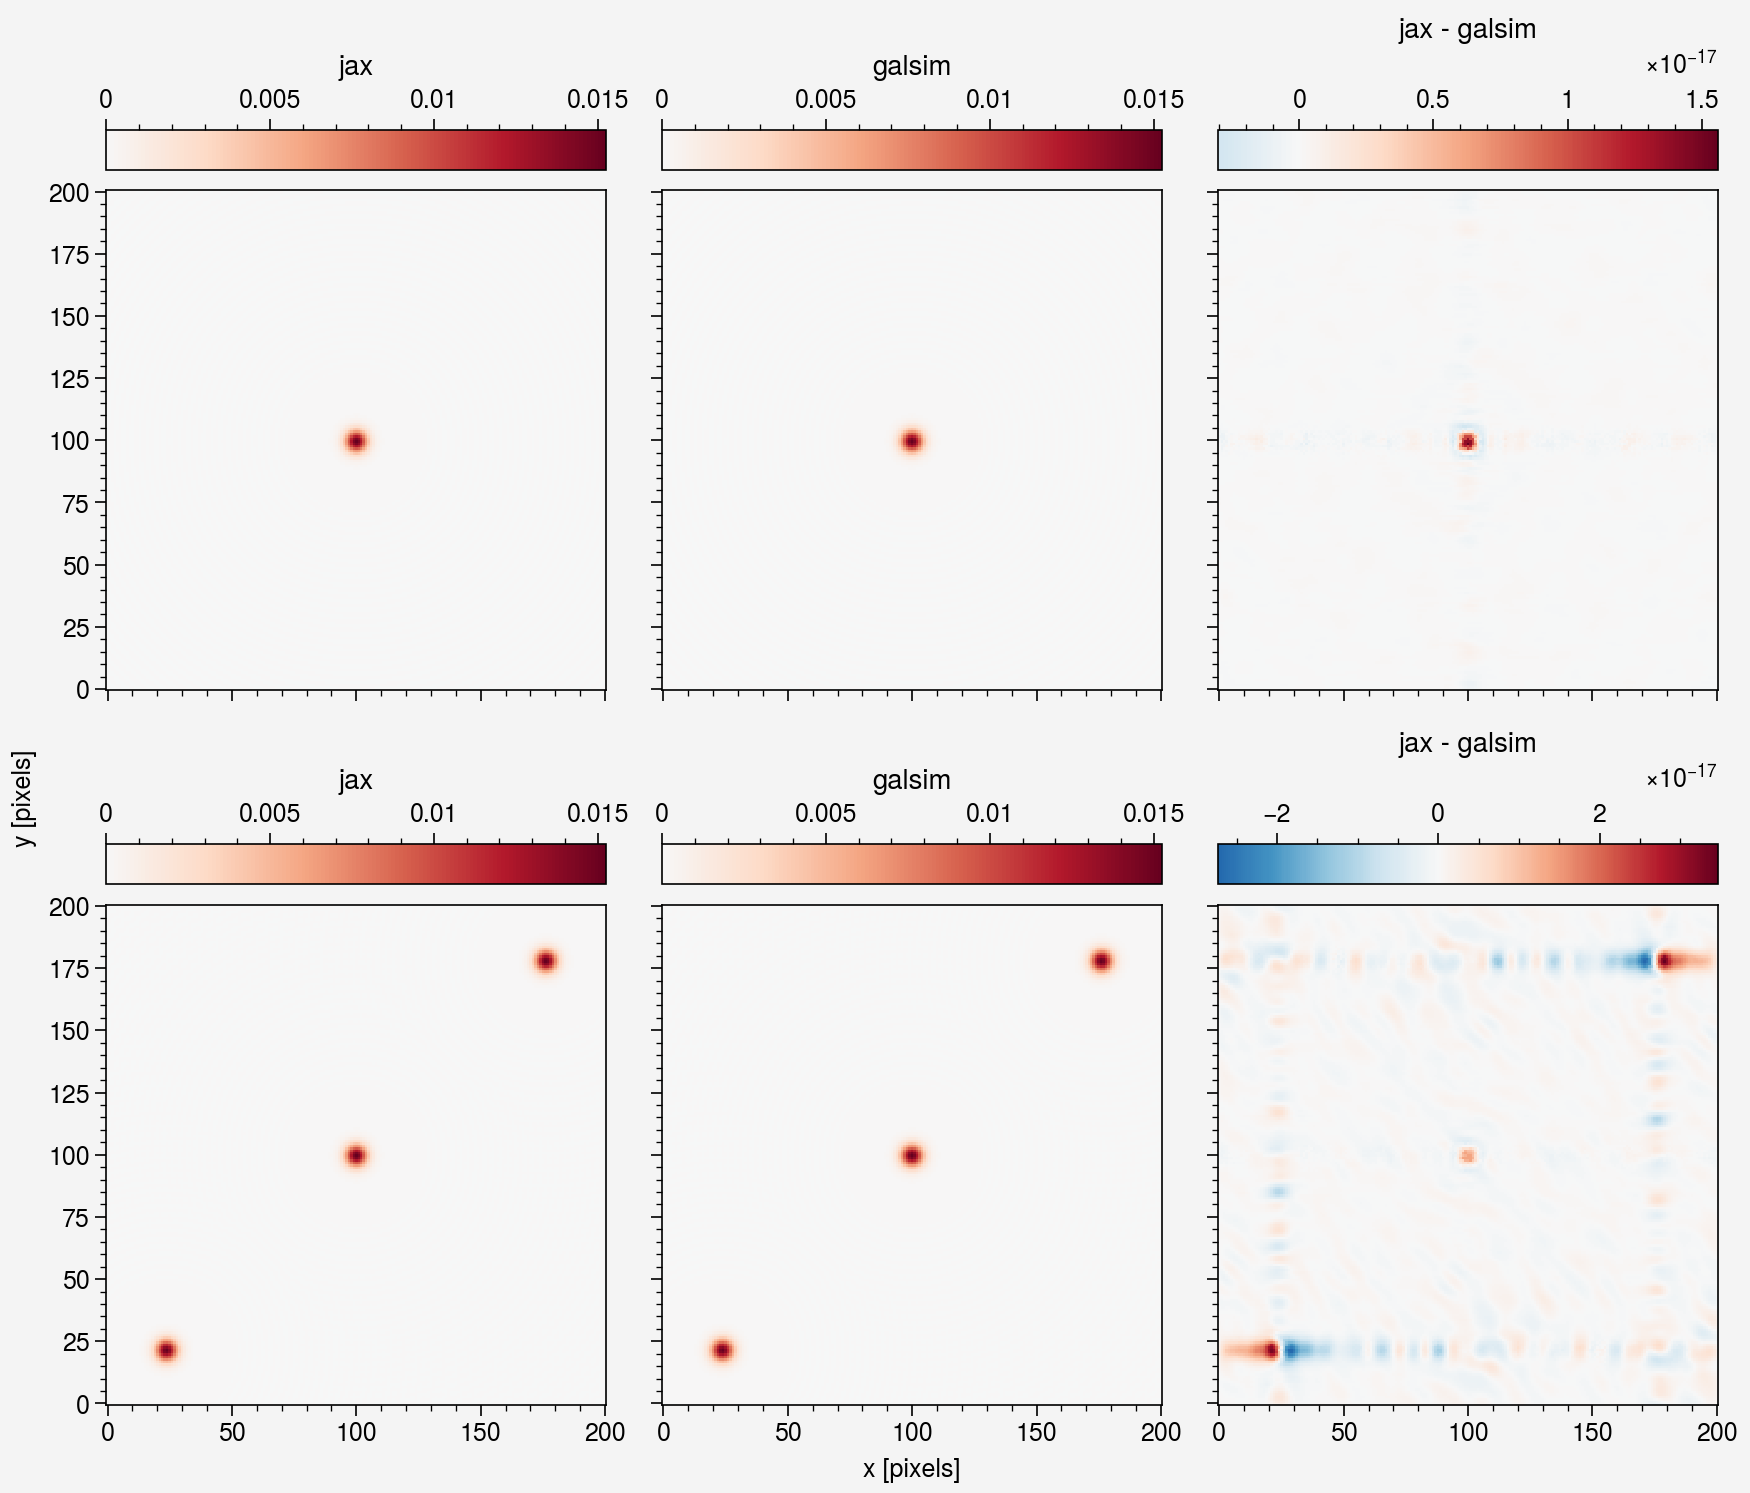

In [ ]:
def _make_data(gsmod, cen=False):
    scale = 0.2
    if cen:
        dx = 0.0
        dy = 0.0
    else:
        dx = 76.23
        dy = 76.23
    psf = gsmod.Gaussian(fwhm=0.9)
    psf_reconv = gsmod.Gaussian(fwhm=1.1)
    gal = gsmod.Exponential(half_light_radius=0.5)

    if not cen:
        gal = (
            gal
            + gal.shift(
                dx * scale, dy * scale
            )
            + gal.shift(
                -dx * scale, -dy * scale
            )
        )

    obj = gsmod.Convolve([psf, gal])

    img = obj.drawImage(
        scale=scale,
        dtype=float,
        nx=201,
        ny=201,
    )
    obj_interp = gsmod.InterpolatedImage(
        img, scale=0.2, x_interpolant="lanczos15",
        _force_stepk=0.8310626381589368 if cen else 0.178924640717773,
        _force_maxk=7.526732399225545,
    )
    img = psf.drawImage(
        scale=scale,
        dtype=float,
        nx=53, ny=53,
    )
    psf_interp = gsmod.InterpolatedImage(
        img, scale=0.2, x_interpolant="lanczos15",
        _force_stepk=0.9608620039112153,
        _force_maxk=9.694758579437252,
    )

    print(obj_interp.stepk, obj_interp.maxk, psf_interp.stepk, psf_interp.maxk)

    obj_deconv = gsmod.Convolve([obj_interp, gsmod.Deconvolve(psf_interp)])
    obj_reconv = gsmod.Convolve(
        [obj_deconv, psf_reconv],
        gsparams=gsmod.GSParams(
            minimum_fft_size=1024,
            maximum_fft_size=1024,
        )
    )

    return obj_reconv.drawImage(
        nx=201,
        ny=201,
        scale=scale,
        dtype=float,
    )


_plot_gsmod(_make_data)